# Salesforce

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

In [ ]:
# Set the ticker and date range
symbol = "CRM"
start_date = "2020-01-01"
end_date = "2025-02-28"

#  Download monthly stock data
stock_data = yf.download(symbol, start=start_date, end=end_date, interval="1mo")
stock_data.columns.name = None  # Remove top-level label like "Price"
stock_data.to_csv("crm_stock_data_2020_2025.csv")
print("Stock data saved to 'crm_stock_data_2020_2025.csv'")

# Download raw financial statements
crm = yf.Ticker(symbol)

# No transpose, no formatting — save as-is
crm.financials.to_csv("crm_income_statement_raw.csv")
crm.balance_sheet.to_csv("crm_balance_sheet_raw.csv")
crm.cashflow.to_csv("crm_cash_flow_raw.csv")

print("Financial statements saved:")
print("- crm_income_statement_raw.csv")
print("- crm_balance_sheet_raw.csv")
print("- crm_cash_flow_raw.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Stock data saved to 'crm_stock_data_2020_2025.csv'
Financial statements saved:
- crm_income_statement_raw.csv
- crm_balance_sheet_raw.csv
- crm_cash_flow_raw.csv


# EMA

[*********************100%***********************]  1 of 1 completed


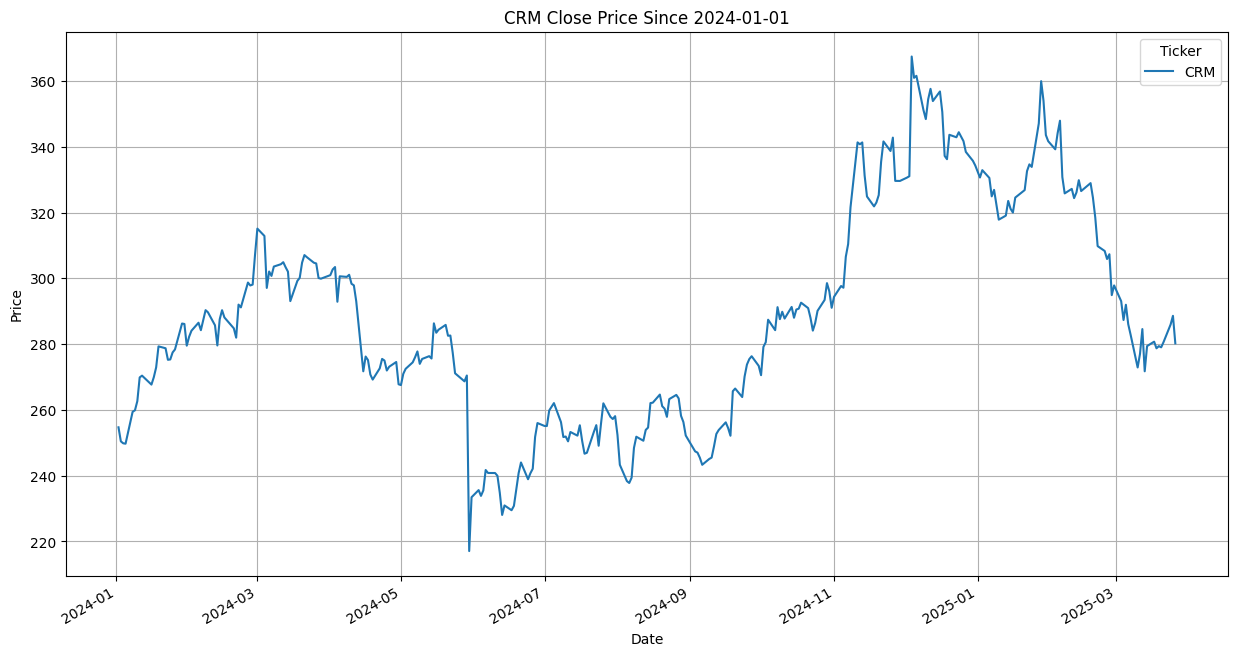

Ticker,CRM
Date,
2024-01-02,254.707352
2024-01-03,250.441193
2024-01-04,249.844528
2024-01-05,249.725159
2024-01-08,259.421021


In [3]:
# Set Salesforce ticker and start date
ticker = 'CRM'
start_date = '2024-01-01'

# Download close price data from Yahoo Finance
mydata = yf.download(ticker, start=start_date)['Close']

# Plot the stock close price
mydata.plot(figsize=(15, 8))
plt.grid()
plt.ylabel('Price')
plt.title(f'{ticker} Close Price Since {start_date}')
plt.show()

# Create DataFrame from the close price data
df = pd.DataFrame(mydata)
df.head()


[*********************100%***********************]  1 of 1 completed


<Figure size 2000x1000 with 0 Axes>

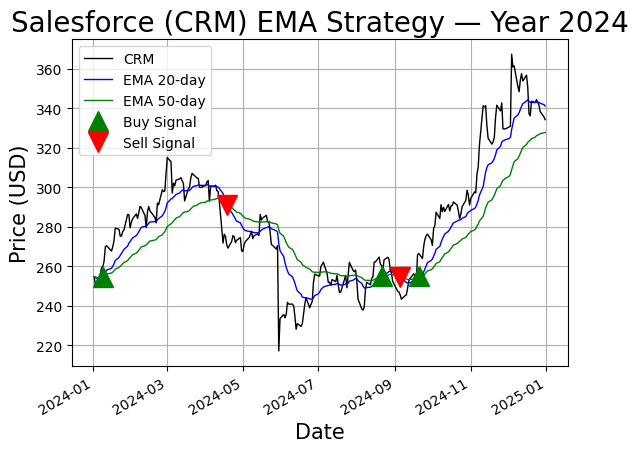


 Buy/Sell Signals in 2024:

+---------------------+--------------------+-----------------+-----------------+--------------------+
| Date                |   ('Close', 'CRM') |   ('EMA20', '') |   ('EMA50', '') | ('Position', '')   |
|---------------------+--------------------+-----------------+-----------------+--------------------|
| 2024-01-09 00:00:00 |            259.888 |         254.603 |         254.596 | Buy                |
| 2024-04-18 00:00:00 |            270.763 |         290.881 |         291.284 | Sell               |
| 2024-08-21 00:00:00 |            260.384 |         254.881 |         254.542 | Buy                |
| 2024-09-05 00:00:00 |            245.454 |         254.199 |         254.652 | Sell               |
| 2024-09-20 00:00:00 |            266.496 |         254.896 |         254.412 | Buy                |
+---------------------+--------------------+-----------------+-----------------+--------------------+


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Download data for 2024 only
df = yf.download("CRM", start="2024-01-01", end="2025-01-01")
df = df[['Close']]

# Calculate Exponential Moving Averages
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Generate buy/sell signals
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

# Plot the stock with EMAs and buy/sell markers
plt.figure(figsize=(20, 10))
df['Close'].plot(color='k', lw=1, label='Close')
df['EMA20'].plot(color='blue', lw=1, label='EMA 20-day')
df['EMA50'].plot(color='green', lw=1, label='EMA 50-day')
plt.plot(df[df['Position'] == 1].index, df['EMA20'][df['Position'] == 1], 
         '^', markersize=15, color='green', label='Buy Signal')
plt.plot(df[df['Position'] == -1].index, df['EMA50'][df['Position'] == -1], 
         'v', markersize=15, color='red', label='Sell Signal')
plt.title('Salesforce (CRM) EMA Strategy — Year 2024', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# Tabulate Buy/Sell points
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)].copy()
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')

print("\n Buy/Sell Signals in 2024:\n")
print(tabulate(df_position[['Close', 'EMA20', 'EMA50', 'Position']], headers='keys', tablefmt='psql'))


# SMA

[*********************100%***********************]  1 of 1 completed

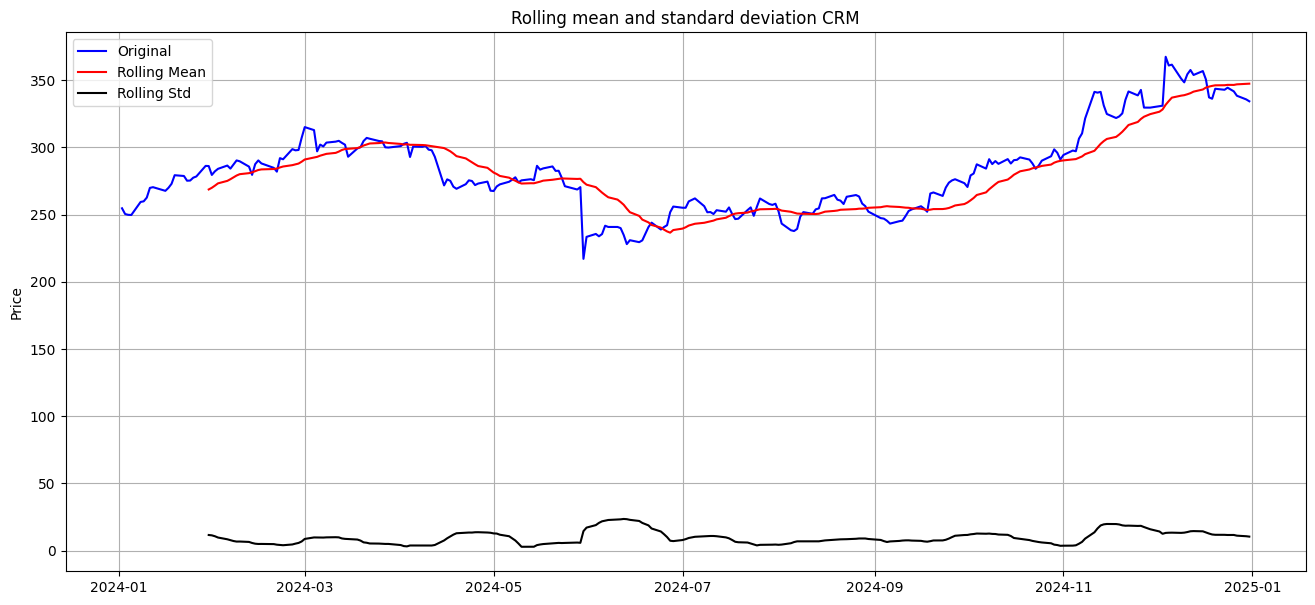

Price,Close,SMA20,SMA50
Ticker,CRM,,
Date,,,
2024-01-02,254.707352,254.707352,254.707352
2024-01-03,250.441177,252.574265,252.574265
2024-01-04,249.844513,251.664347,251.664347
2024-01-05,249.725174,251.179554,251.179554
2024-01-08,259.421051,252.827853,252.827853


In [5]:
# Download CRM data for 2024
df = yf.download("CRM", start="2024-01-01", end="2025-01-01")
df = df[['Close']]

# Calculate rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()

plt.figure(figsize = (16, 7))
fig = plt.figure(1)

orig = plt.plot(df['Close'], color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'CRM')
plt.grid()
plt.ylabel("Price")
plt.show()

# Create 20-day simple moving average column
df['SMA20'] = df['Close'].rolling(window=20, min_periods=1).mean()
# Create 50-day simple moving average column
df['SMA50'] = df['Close'].rolling(window=50, min_periods=1).mean()

# Display first few rows
df.head()

[*********************100%***********************]  1 of 1 completed


<Figure size 2000x1000 with 0 Axes>

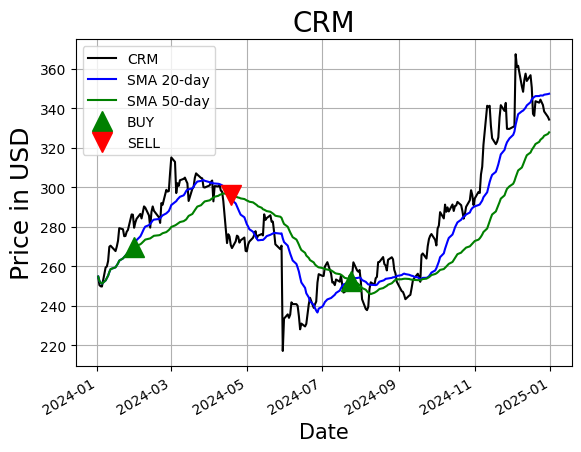

+---------------------+--------------------+-----------------+-----------------+------------------+--------------------+
| Date                |   ('Close', 'CRM') |   ('SMA20', '') |   ('SMA50', '') |   ('Signal', '') | ('Position', '')   |
|---------------------+--------------------+-----------------+-----------------+------------------+--------------------|
| 2024-01-31 00:00:00 |            279.529 |         269.963 |         269.237 |                1 | Buy                |
| 2024-04-18 00:00:00 |            270.763 |         295.408 |         296.036 |                0 | Sell               |
| 2024-07-24 00:00:00 |            249.104 |         252.762 |         252.749 |                1 | Buy                |
+---------------------+--------------------+-----------------+-----------------+------------------+--------------------+


In [6]:
# Download CRM stock data for 2024
df = yf.download("CRM", start="2024-01-01", end="2025-01-01")
df = df[['Close']]

# Create 20-day and 50-day Simple Moving Averages
df['SMA20'] = df['Close'].rolling(window=20, min_periods=1).mean()
df['SMA50'] = df['Close'].rolling(window=50, min_periods=1).mean()

# Trade signals
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

# Plot
plt.figure(figsize=(20, 10))
df['Close'].plot(color='k', label='Close')
df['SMA20'].plot(color='b', label='SMA 20-day')
df['SMA50'].plot(color='g', label='SMA 50-day')
plt.plot(df[df['Position'] == 1].index,
         df['SMA20'][df['Position'] == 1],
         '^', markersize=15, color='g', label='BUY')
plt.plot(df[df['Position'] == -1].index,
         df['SMA50'][df['Position'] == -1],
         'v', markersize=15, color='r', label='SELL')
plt.ylabel('Price in USD', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.title('CRM', fontsize=20)
plt.legend()
plt.grid()
plt.show()

# Display Buy/Sell signal table
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers='keys', tablefmt='psql'))


# Monte carlo simulation

[*********************100%***********************]  1 of 1 completed


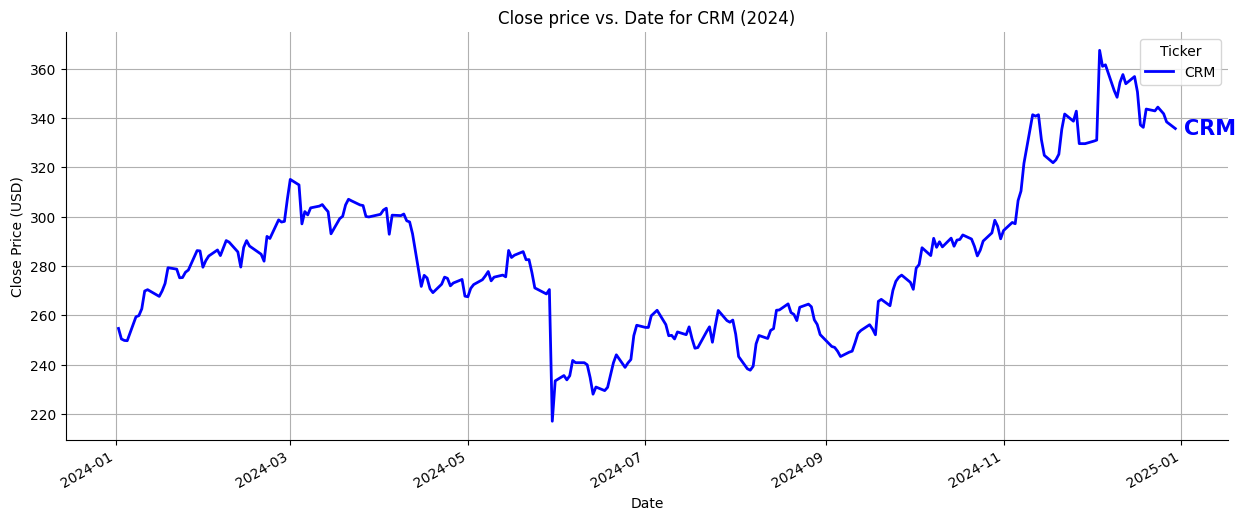

<Figure size 1500x600 with 0 Axes>

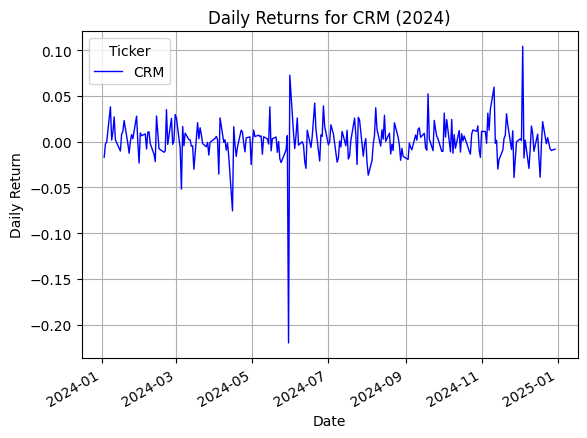

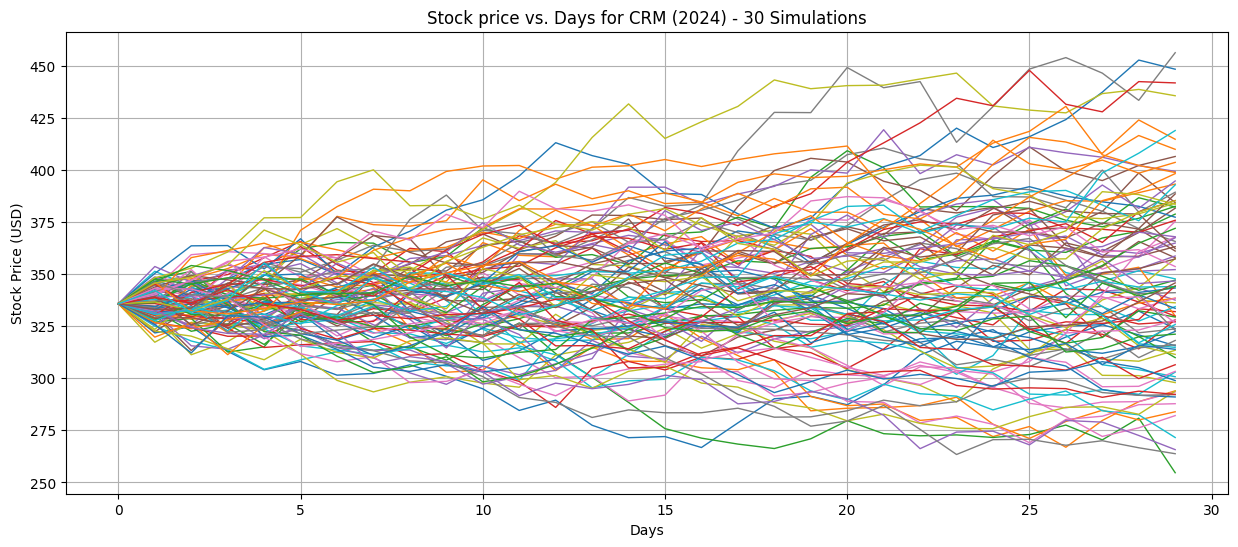

In [ ]:
import seaborn as sns
from scipy.stats import norm

def monte_carlo(ticker='CRM'):  
    """ Monte Carlo Simulation for stock price forecasting """

    # Fetch data for CRM (2024 only)
    data = yf.download(ticker, start='2024-01-01', end='2024-12-31')['Close']

    # Plot Close Price for 2024
    ax = data.plot(figsize=(15,6), color='blue', linewidth=2)
    plt.title(f"Close price vs. Date for {ticker} (2024)")
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")

    # Annotate the last data point
    last_y = data.iloc[-1]
    last_x = data.index[-1]
    ax.annotate(f"{ticker}",
                xy=(last_x, last_y),
                xytext=(6, 0),
                color='blue',
                xycoords='data',
                textcoords="offset points",
                size=15, va="center", fontweight='bold')

    # Clean up plot
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid()
    plt.show()

    # Calculate daily log returns
    stock_returns = np.log(1 + data.pct_change())

    # Plot daily returns
    plt.figure(figsize=(15,6))
    stock_returns.plot(color='blue', linewidth=1)
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.title(f"Daily Returns for {ticker} (2024)")
    plt.grid()
    plt.show()

    # Monte Carlo Simulation Parameters
    u = stock_returns.mean()
    var = stock_returns.var()
    drift = u - (0.5 * var)
    stddev = stock_returns.std()

    np.random.seed(42)
    Z = norm.ppf(np.random.rand(30, 100)) 
    get_daily_returns = np.exp(drift.values + stddev.values * Z)

    S0 = data.iloc[-1]  # Last closing price
    price_paths = np.zeros_like(get_daily_returns)
    price_paths[0] = S0

    # Generate simulated price paths
    for t in range(1, 30):
        price_paths[t] = price_paths[t-1] * get_daily_returns[t]

    # Plot Monte Carlo Simulations
    plt.figure(figsize=(15,6))
    for i in range(price_paths.shape[1]):  
        plt.plot(price_paths[:, i], linewidth=1)
    plt.title(f"Stock price vs. Days for {ticker} (2024) - 100 Simulations")
    plt.xlabel("Days")
    plt.ylabel("Stock Price (USD)")
    plt.grid()
    plt.show()

# Call the function for Salesforce (CRM)
monte_carlo('CRM')


# prophet

[*********************100%***********************]  1 of 1 completed
15:02:33 - cmdstanpy - INFO - Chain [1] start processing
15:02:33 - cmdstanpy - INFO - Chain [1] done processing


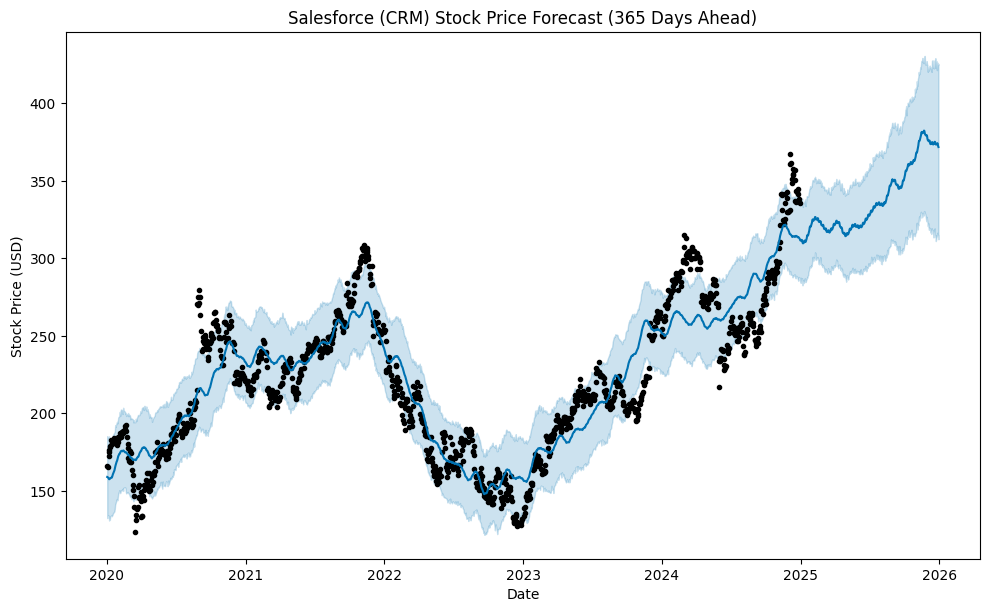

             ds        yhat  yhat_lower  yhat_upper
1612 2025-12-21  375.078261  313.965915  428.069686
1613 2025-12-22  373.869779  314.994677  429.041375
1614 2025-12-23  373.365553  311.081340  422.684241
1615 2025-12-24  373.361640  312.133471  427.235884
1616 2025-12-25  373.534851  314.318971  427.064724
1617 2025-12-26  373.500031  314.266374  421.299520
1618 2025-12-27  374.223582  316.466841  426.251098
1619 2025-12-28  373.948637  314.326297  425.200427
1620 2025-12-29  372.481588  315.262934  424.562482
1621 2025-12-30  371.732590  312.226585  425.334129


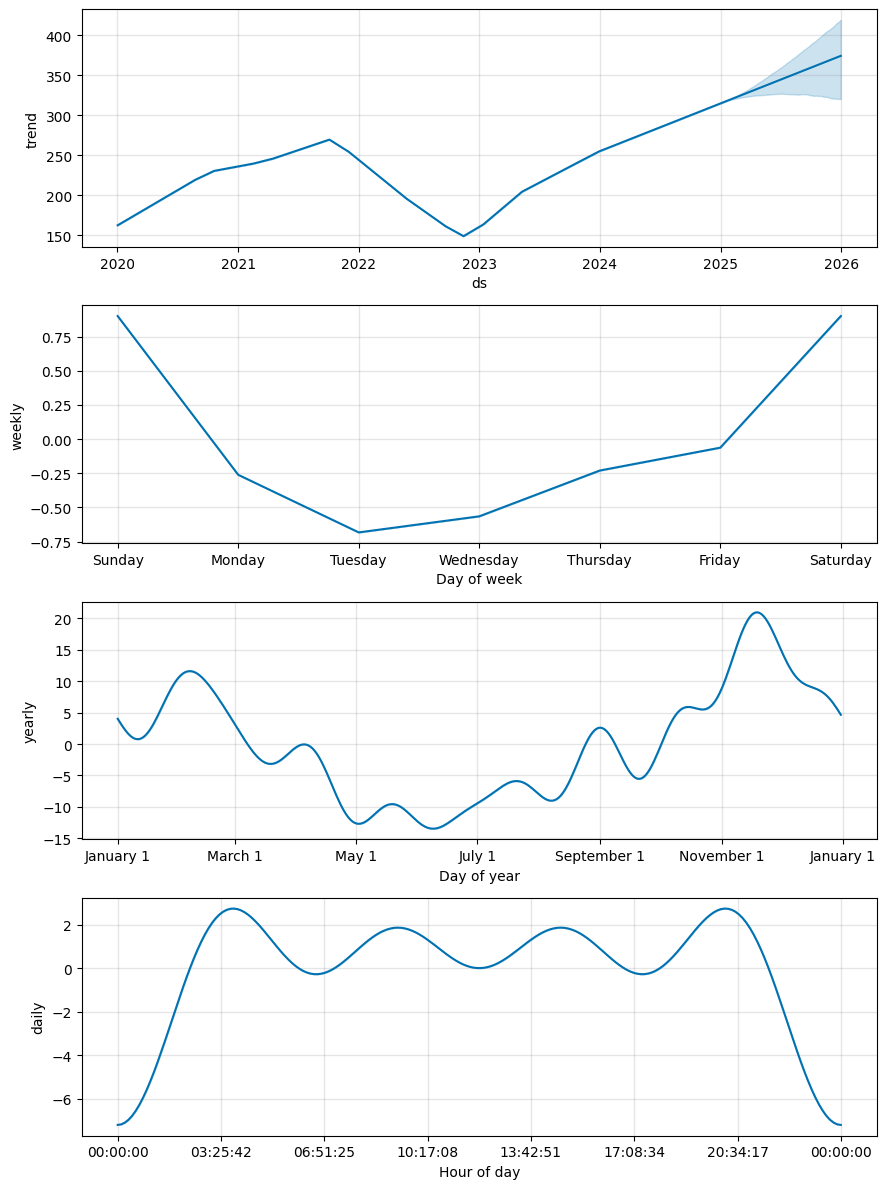

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

#  Download CRM data for 2024
df = yf.download("CRM", start="2020-01-01", end="2024-12-31")
df = df.reset_index()
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Initialize and train the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Create a future DataFrame for the next 365 days
future = model.make_future_dataframe(periods=365)

#  Predict future values
forecast = model.predict(future)

# Static matplotlib plot
fig1 = model.plot(forecast)
plt.title("Salesforce (CRM) Stock Price Forecast (365 Days Ahead)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid()
plt.show()

#  Forecast components
fig2 = model.plot_components(forecast)

# Interactive plot with Plotly
plot_plotly(model, forecast)

#  last 10 forecasted rows
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

